This can be for working on the project together to make the tree

In [ ]:
import pandas as pd
import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score



In [16]:
# need csv file to run anything
data = pd.read_csv(?) 
X = data.drop('target_column', axis=1) 
y = data['target_column']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

SyntaxError: invalid syntax (1192432227.py, line 2)

In [ ]:
# need data for choosing which columns to standardize and which to one-hot encode
ct = make_column_transformer(
        (StandardScaler(), standard_scaler_columns),
        (OneHotEncoder(handle_unknown='ignore'), one_hot_columns)
)
pipeline = make_pipeline(
    ct,
    DecisionTreeClassifier()
)
model = pipeline.fit(X, y)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


tree.plot_tree(model)
plt.show()

NameError: name 'make_column_transformer' is not defined

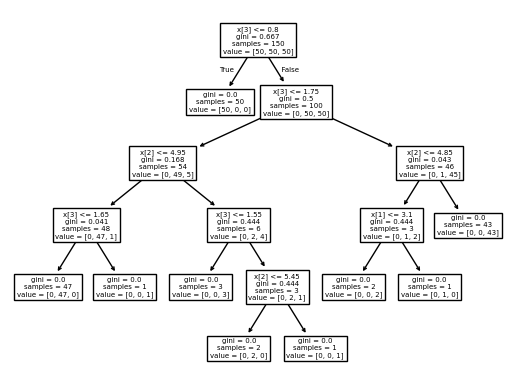

In [19]:
from sklearn.datasets import load_iris
from sklearn import tree
import matplotlib.pyplot as plt
iris = load_iris()
X, y = iris.data, iris.target
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, y)
tree.plot_tree(clf)
plt.show()